# Machine Learning
## LAB 5 - Classification tasks

In [1]:
from scipy.spatial import distance
from scipy.io import loadmat

from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

import pandas as pd
from six import StringIO
import pydot
import matplotlib.pyplot as plt
import numpy as np
import random

# Exercise 1  - kNN - własna implementacja
#### Proszę przedstawić własną implementację algorytmu “K najbliższych sąsiadów”.

In [2]:
iris = datasets.load_iris()

##### 1. Baza danych Iris - proszę podzielić na zbiór uczący i testowy
###### zbiór uczący - 50%
###### zbiór testowy - 50%

In [3]:
features_train, features_test, labels_train, labels_test=train_test_split(iris.data, iris.target, test_size=0.5)

##### Przykład użycia odległości euklidesowej:

In [4]:
a = (1, 2, 3)
b = (4, 5, 6)
dst = distance.euclidean(a, b)

In [5]:
dst

5.196152422706632

##### 2. Wybieramy wartość k

In [6]:
k = 5

#### 3. Poszukujemy k obserwacji, które są najbliższe do naszego analizowanego przykładu. Do wyznaczania odległości skorzystaj z algorytmu Eukleidesa.

In [7]:
def kNN(NewPoint, CurrentPoints, PointsLabels, k):
    dist = pd.DataFrame(columns=['Distance', 'Label'])
    
    for Point, label in zip(CurrentPoints, PointsLabels):
        dist = dist.append({'Distance':distance.euclidean(NewPoint, Point), 'Label':label}, ignore_index=True)
        
    dist.sort_values(by=['Distance'], inplace=True)
    cnt = dist.iloc[:k]['Label'].value_counts() # 4. Użyj najczęściej pojawiającej się wartości z “k najbliższych sąsiadów” jako wartość dla nieznanego Iris.
    
    if len(cnt) > 1:
        ki = 1
        while cnt.index[0] == cnt.index[1]:
            cnt = dist.iloc[:k+ki]['Label'].value_counts()
            ki += 1
    return cnt.index[0]

In [8]:
predictions = list()
for data in features_test:
    predictions.append(kNN(data, features_train, labels_train, k))

#### Sprawdzanie skuteczności klasyfikatora:

In [9]:
output = accuracy_score(labels_test, predictions)

In [10]:
print(output)

0.9733333333333334


# Exercise 2 - kNN - Python (sklearn)
##### Proszę rozwiązać powyższe zadanie korzystając z biblioteki sklearn.neighbors.KNeighborsClassifier.

###### 1. Podziel zbiór na uczący (70 %) i treningowy (30 %).

In [11]:
iris = datasets.load_iris()
features_train, features_test, labels_train, labels_test=train_test_split(iris.data, iris.target, test_size=0.3)

###### 2. Stworzenie klasyfikatora i jego wyuczenie.

In [12]:
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(features_train, labels_train)

KNeighborsClassifier()

###### 3. Predykcja wartości.

In [13]:
predictions = neigh.predict(features_test)

###### 4. Wyznaczenie miary skuteczności dla zbioru testowego (ang. accuracy).

In [14]:
output = accuracy_score(labels_test, predictions)

In [15]:
print(output)

0.9777777777777777


# Exercise 3 - drzewa decyzyjne
##### W bibliotece scikit-learn drzewa decyzyjne implementowane są przez klasę DecisionTreeClassifier.

#### Przykład - zbiór danych Iris

In [16]:
iris = load_iris()

In [17]:
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier()

#### Przewidywanie przynależności przykładów do klas:

In [18]:
clf.predict(iris.data[:1, :])

array([0])

#### Estymowanie prawdopodobieństwa przynależności do klas:

In [19]:
clf.predict_proba(iris.data[:1, :])

array([[1., 0., 0.]])

##### Proszę zilustrować wynik za pomocą narzędzia Graphiz oraz doinstalowania do pythona biblioteki pydot (zadanie proszę wykonać w domu i wygenerować plik *.png lub *.pdf).

In [20]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_png("Lab5_iris.png")

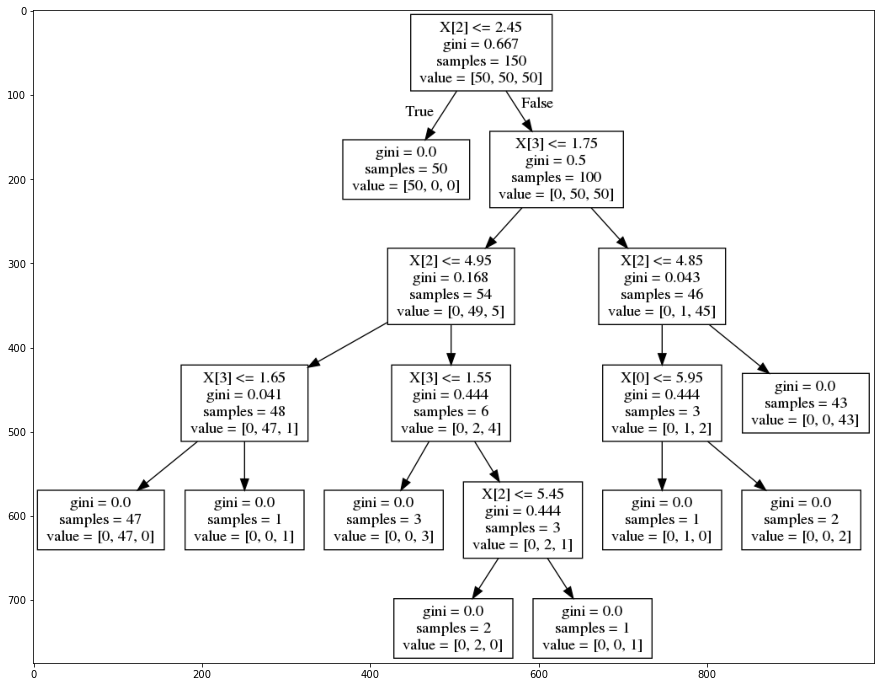

In [21]:
schema_im = plt.imread('Lab5_iris.png')
plt.figure(figsize=(20,12))
plt.imshow(schema_im)

# Exercise 4 - Klasyfikacja ręczni pisanych cyfr.
##### Klasyfikacja ręczni pisanych cyfr. Obrazki zostały znormalizowane do rozmiaru 20 x 20 px. Dane, z których będziemy korzystać stanowią obrazek przetworzony do formatu jednowymiarowego przez ułożenie kolejnych wierszy. Dane te pochodzą z bazy danych ręcznie pisanych cyfr MNIST.

#### wczytywanie danych

In [22]:
dane = loadmat('Lab5_mnist.mat')

In [23]:
dane

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

#### Zad 1. Podziel dane na parametry X oraz odpowiedź y:

In [24]:
X = dane['X']
y = dane['y']

#### Standaryzacja:

In [25]:
for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])

#### Zamiana cyfry 10 -> 0 (błąd w zbiorze danych):

In [26]:
y[np.where(y==10)]=0

#### Wysokość i szerokość obrazka z cyfrą:

In [27]:
h = 20
w = 20

#### Zad 2. Proszę wyświetlić liczbę cyfr oraz liczbę pikseli przypadającą na jeden obraz.

In [28]:
print(f'Amount of numbers: {y.size}')
print(f'Amount of pixels for one image: {X[0,:].size}')

Amount of numbers: 5000
Amount of pixels for one image: 400


#### Funkcja pomocnicza plot_mnist do wyświetlania obrazków z bazy danych:

In [29]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

##### Zad 3. Proszę wyświetlić przykładowe cyfry ze zbioru danych (funkcja plot_mnist).

/home/ayane/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


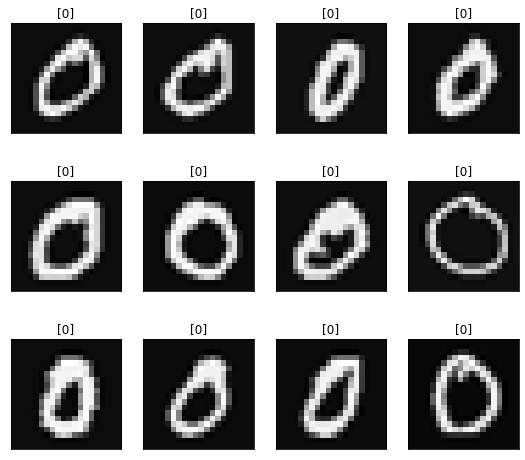

In [30]:
plot_mnist(X, y, h, w)

##### Zad 4. Proszę podzielić zbiór danych na uczący (70 %) i treningowy.

In [31]:
features_train, features_test, labels_train, labels_test = train_test_split(X, y, test_size=0.3)

##### Zad 5. Proszę stworzyć instancję klasyfikatora, następnie uczenie oraz predykcja dla danych testowych.

In [32]:
DEPTH = 10

clf = tree.DecisionTreeClassifier(max_depth=DEPTH)
clf.fit(features_train, labels_train)

predictions = clf.predict(features_test)

In [33]:
accuracy_score(labels_test, predictions)

0.7686666666666667

##### Zad 6. Proszę przedstawić wynik F1, macierz błędów (confusion matrix) oraz raport klasyfikacji. 

In [34]:
print(classification_report(labels_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       146
           1       0.87      0.89      0.88       144
           2       0.72      0.72      0.72       150
           3       0.68      0.69      0.69       140
           4       0.81      0.83      0.82       161
           5       0.58      0.61      0.60       132
           6       0.80      0.83      0.81       162
           7       0.89      0.71      0.79       175
           8       0.75      0.66      0.70       140
           9       0.73      0.87      0.79       150

    accuracy                           0.77      1500
   macro avg       0.77      0.77      0.77      1500
weighted avg       0.77      0.77      0.77      1500



In [35]:
confusion_matrix(labels_test, predictions)

array([[123,   1,   0,   2,   0,   9,   4,   5,   2,   0],
       [  0, 128,   4,   1,   3,   1,   1,   1,   2,   3],
       [  5,   1, 108,   7,   2,   6,   7,   3,  10,   1],
       [  1,   3,   6,  97,   1,  13,   3,   2,   6,   8],
       [  3,   0,   4,   0, 133,   6,   3,   0,   3,   9],
       [  5,   2,   4,  12,   6,  81,  10,   1,   5,   6],
       [  2,   0,   7,   2,   4,  10, 134,   0,   2,   1],
       [  1,   5,   7,  12,   8,   1,   1, 125,   0,  15],
       [  4,   5,   8,   8,   5,   7,   3,   1,  93,   6],
       [  1,   2,   1,   1,   3,   5,   2,   3,   1, 131]])

In [36]:
f1_score(labels_test, predictions, average=None)

array([0.84536082, 0.87972509, 0.72240803, 0.68794326, 0.81595092,
       0.59778598, 0.81212121, 0.79113924, 0.70454545, 0.79393939])